In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autoviz import AutoViz_Class
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [2]:
%matplotlib inline

In [3]:
CHLA_2023 = pd.read_csv('CHLA_clean_data_until_2023.csv')


In [4]:
CHLA_2023.head()  # Display the first few rows of the combined dataframe

,MRN,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,SCHEDULE_ID,APPT_ID,LEAD_TIME,IS_REPEAT,APPT_TYPE_STANDARDIZE,APPT_NUM,TOTAL_NUMBER_OF_CANCELLATIONS,TOTAL_NUMBER_OF_RESCHEDULED,TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,IS_NOSHOW,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE
0,1946298,CONFIRMED,12/26/23 10:30,6/6/23 10:32,91387,VALENCIA CARE CENTER,22576917,77137126,202,Y,Follow-up,9,1,2,0,5,0,1,4,12,10,N,14,Non-Hispanic,European
1,4464320,RESCHEDULED,12/26/23 10:00,12/27/22 10:19,91354,VALENCIA CARE CENTER,21812159,74489619,363,Y,Follow-up,4,0,1,0,2,0,1,4,12,10,N,3,Others,Other
2,4464320,CONFIRMED,12/26/23 10:00,12/27/22 10:19,91354,VALENCIA CARE CENTER,22496669,76863542,363,Y,Follow-up,4,0,1,0,2,0,1,4,12,10,N,3,Others,Other
3,4146637,CONFIRMED,12/21/23 10:30,1/23/23 10:59,91350,VALENCIA CARE CENTER,22466003,76767204,331,Y,Follow-up,15,2,8,0,4,0,3,3,12,10,N,12,Non-Hispanic,European
4,4460795,CONFIRMED,12/18/23 9:00,1/9/23 10:59,91402,VALENCIA CARE CENTER,21862889,74656637,342,Y,Follow-up,6,1,1,0,3,0,0,3,12,9,N,13,Others,Other


In [5]:
# Display basic information about the dataframe
print("Basic Information:")
print(CHLA_2023.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   MRN                                       21060 non-null  int64 
 1   APPT_STATUS                               21060 non-null  object
 2   APPT_DATE                                 21060 non-null  object
 3   BOOK_DATE                                 21060 non-null  object
 4   ZIPCODE                                   21060 non-null  object
 5   CLINIC                                    21060 non-null  object
 6   SCHEDULE_ID                               21060 non-null  int64 
 7   APPT_ID                                   21060 non-null  int64 
 8   LEAD_TIME                                 21060 non-null  int64 
 9   IS_REPEAT                                 21060 non-null  object
 10  APPT_TYPE_STANDARDIZE      

In [6]:
# Display summary statistics
print("\nSummary Statistics:")
print(CHLA_2023.describe())


Summary Statistics:
            MRN       SCHEDULE_ID     APPT_ID      LEAD_TIME     APPT_NUM    \
count  2.106000e+04  2.106000e+04  2.106000e+04  21060.000000  21060.000000   
mean   3.821597e+06  1.888858e+07  6.262916e+07     58.140646      5.683523   
std    1.013751e+06  2.668043e+06  1.095787e+07     56.944934      4.798072   
min    1.231746e+06  1.442809e+07  4.502424e+07    -15.000000      1.000000   
25%    4.068335e+06  1.621288e+07  5.143071e+07     18.000000      2.000000   
50%    4.268685e+06  2.013308e+07  6.838222e+07     42.000000      4.000000   
75%    4.431587e+06  2.135795e+07  7.284536e+07     84.000000      7.000000   
max    4.563085e+06  2.258728e+07  7.718306e+07    895.000000     35.000000   

       TOTAL_NUMBER_OF_CANCELLATIONS  TOTAL_NUMBER_OF_RESCHEDULED  \
count          21060.000000                  21060.000000           
mean               0.934236                      1.776448           
std                1.173854                      2.337003   

In [7]:
# Check for missing values
print("\nMissing Values:")
print(CHLA_2023.isnull().sum())


Missing Values:
MRN                                         0
APPT_STATUS                                 0
APPT_DATE                                   0
BOOK_DATE                                   0
ZIPCODE                                     0
CLINIC                                      0
SCHEDULE_ID                                 0
APPT_ID                                     0
LEAD_TIME                                   0
IS_REPEAT                                   0
APPT_TYPE_STANDARDIZE                       0
APPT_NUM                                    0
TOTAL_NUMBER_OF_CANCELLATIONS               0
TOTAL_NUMBER_OF_RESCHEDULED                 0
TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT    0
TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT         0
TOTAL_NUMBER_OF_NOSHOW                      0
DAY_OF_WEEK                                 0
WEEK_OF_MONTH                               0
NUM_OF_MONTH                                0
HOUR_OF_DAY                                 0
IS_NOSHOW        

In [8]:
# Check the distribution of the target variable
print("\nTarget Variable Distribution:")
print(CHLA_2023['IS_NOSHOW'].value_counts())


Target Variable Distribution:
IS_NOSHOW
N    20027
Y     1033
Name: count, dtype: int64


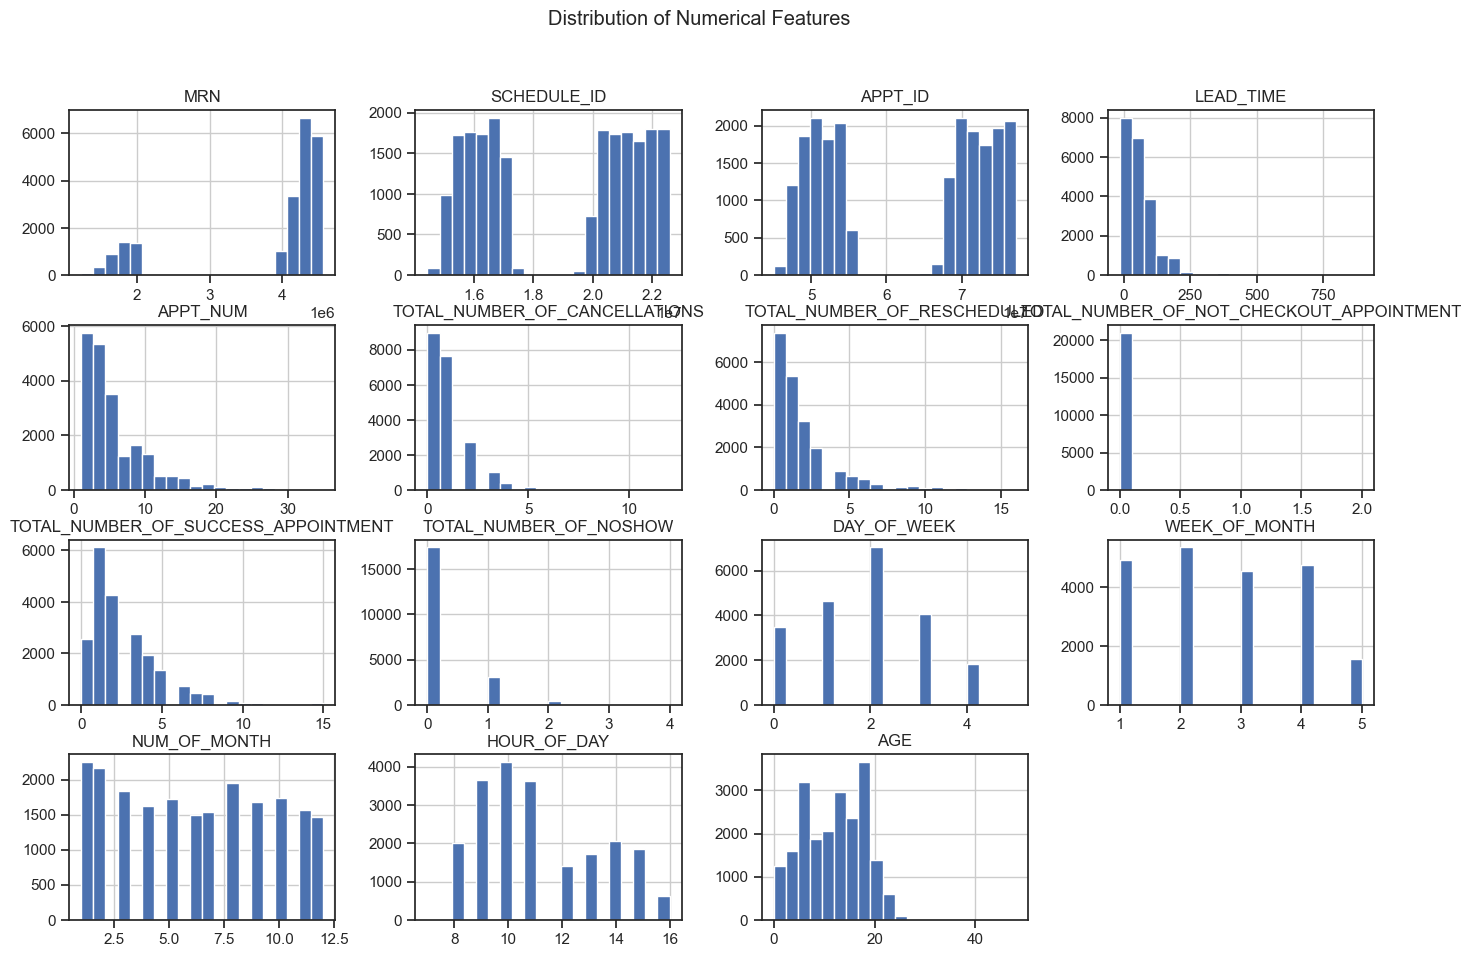

In [9]:

# Plot the distribution of numerical features
numerical_cols = CHLA_2023.select_dtypes(include=['int64', 'float64']).columns
CHLA_2023[numerical_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()


In [10]:

# Count plot for categorical features
#categorical_cols = CHLA_2023.select_dtypes(include=['object']).columns
#for col in categorical_cols:
#    plt.figure(figsize=(8, 4))
#    sns.countplot(data=CHLA_2023, x=col, order=CHLA_2023[col].value_counts().index)
#    plt.title(f"Count Plot for {col}")
#    plt.xticks(rotation=45)
#    plt.show()


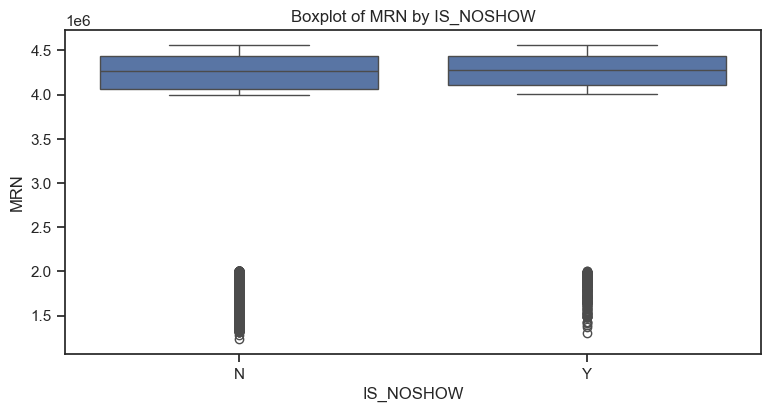

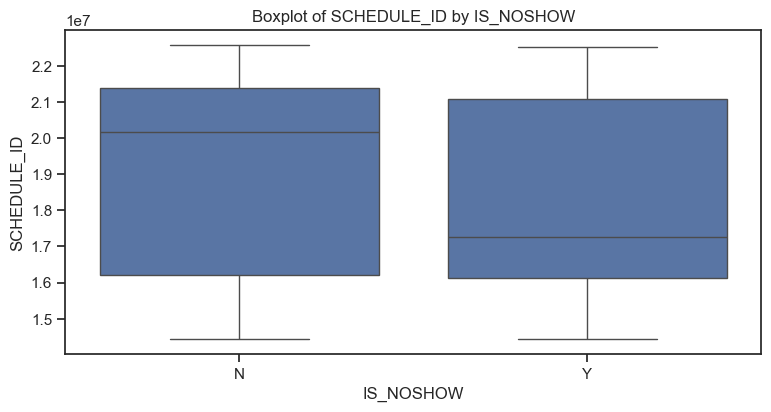

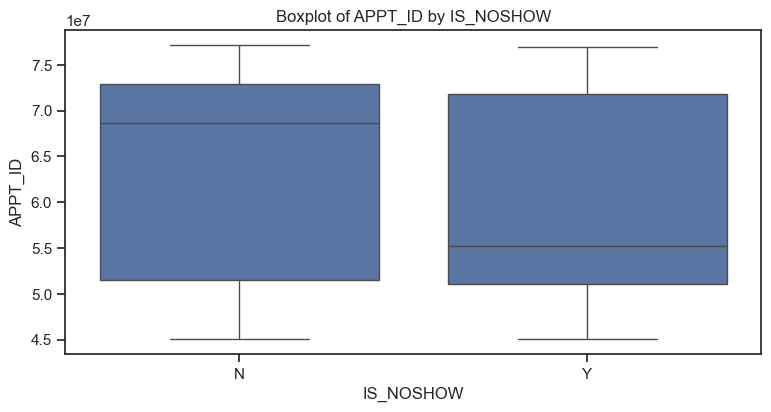

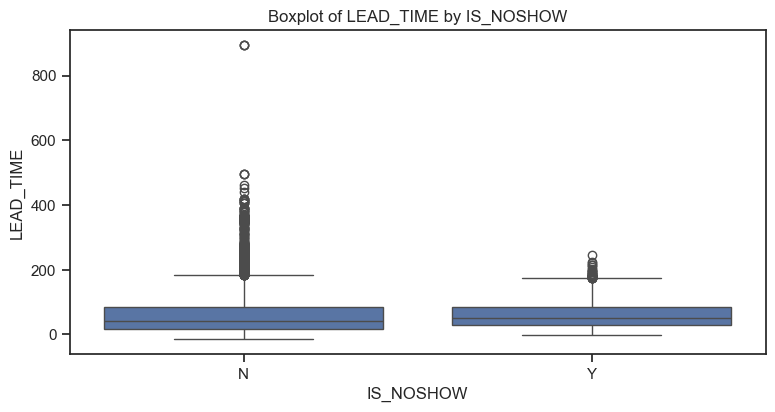

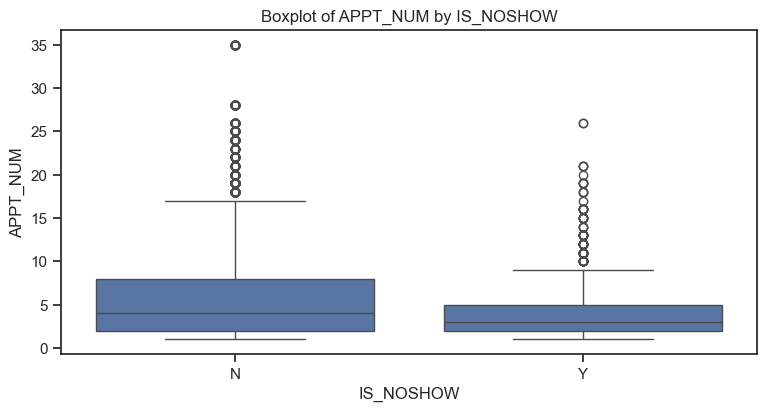

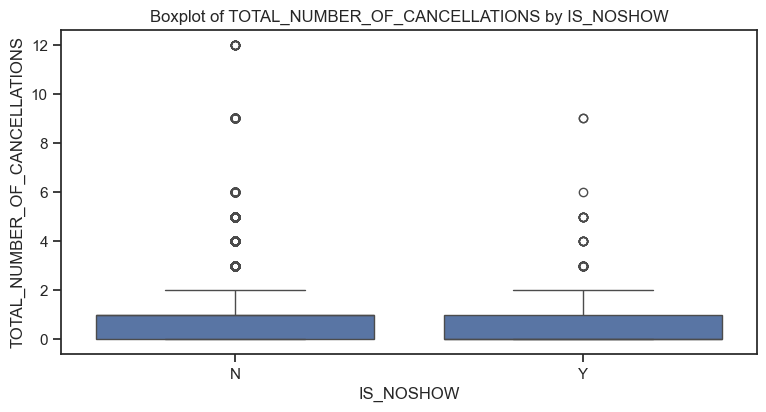

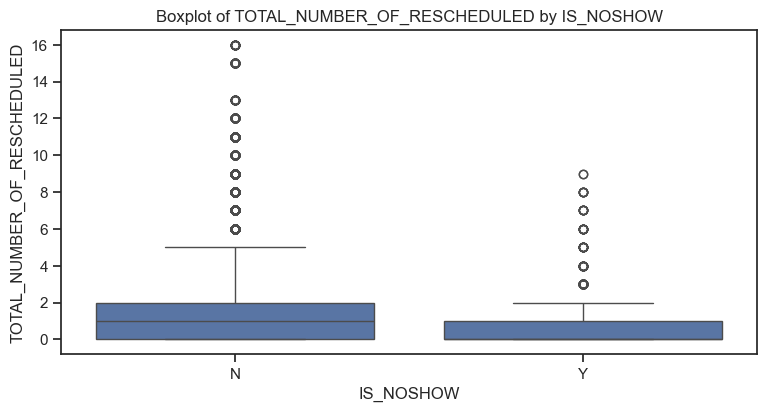

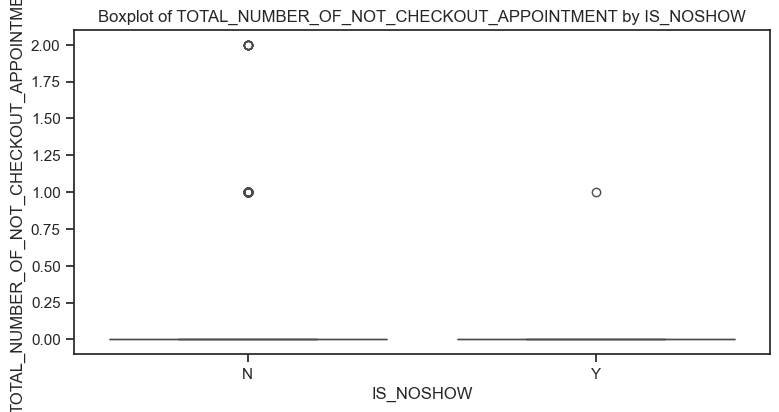

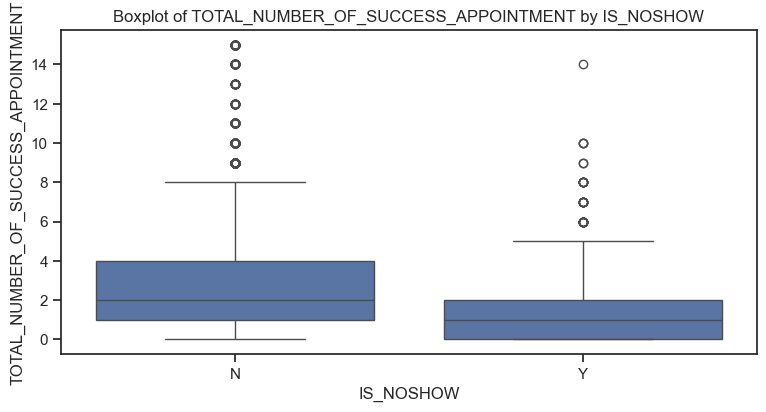

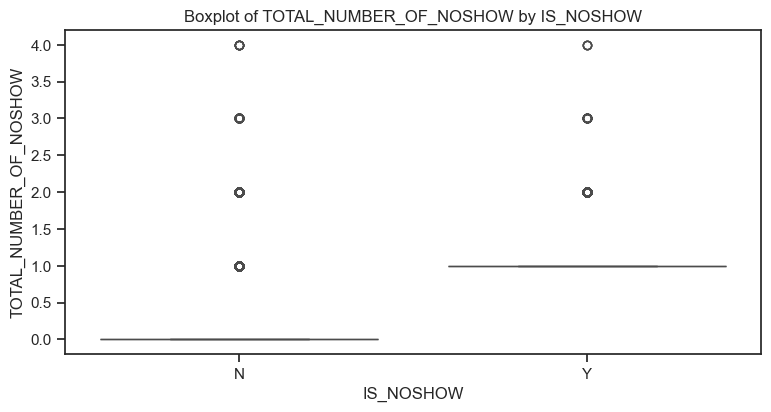

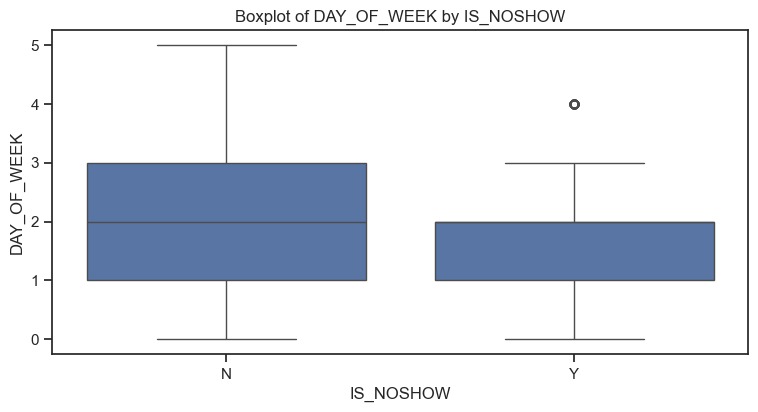

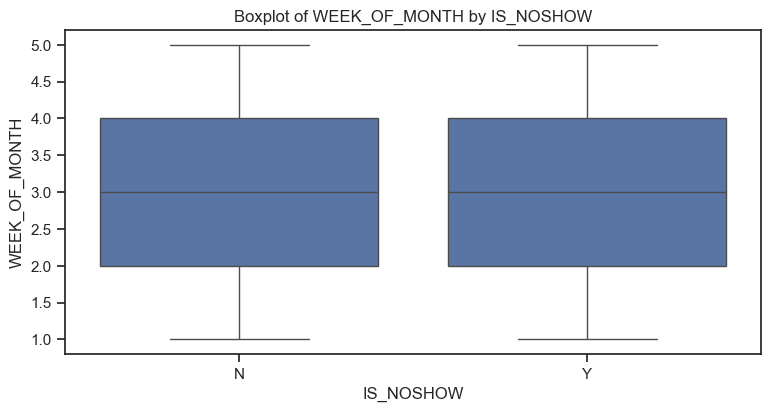

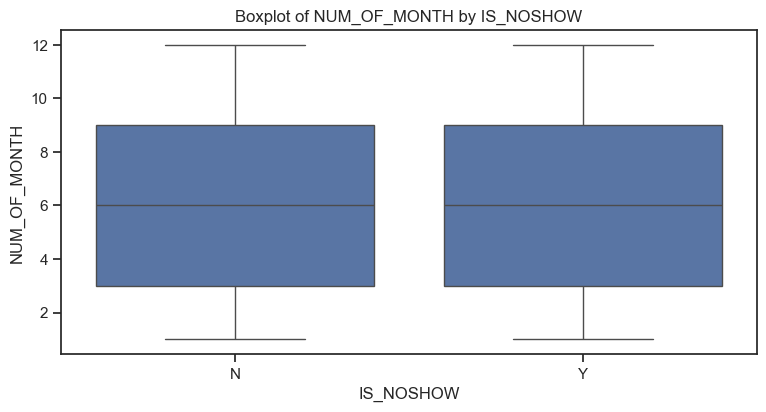

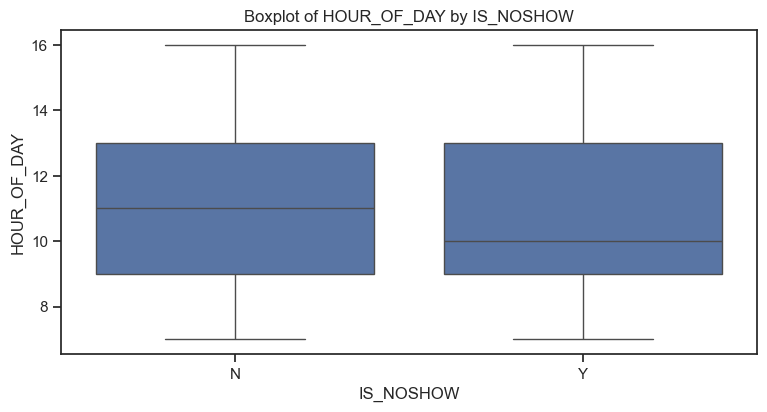

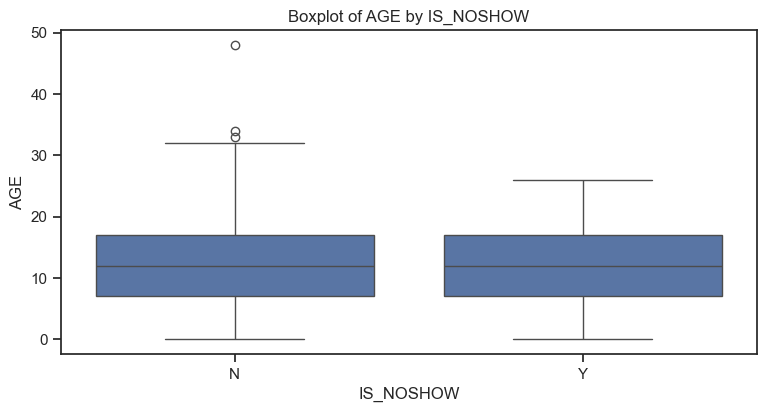

In [11]:

# Boxplot for numerical features against the target variable
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=CHLA_2023, x='IS_NOSHOW', y=col)
    plt.title(f"Boxplot of {col} by IS_NOSHOW")
    plt.show()

In [12]:
#AV = AutoViz_Class()
#AVCHLA = AV.AutoViz(CHLA_2023)  # Automatically visualize the combined dataframe

In [13]:
remaining_columns = CHLA_2023.columns.tolist()
print(f"Remaining columns after dropping: {remaining_columns}")

Remaining columns after dropping: ['MRN', 'APPT_STATUS', 'APPT_DATE', 'BOOK_DATE', 'ZIPCODE', 'CLINIC', 'SCHEDULE_ID', 'APPT_ID', 'LEAD_TIME', 'IS_REPEAT', 'APPT_TYPE_STANDARDIZE', 'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS', 'TOTAL_NUMBER_OF_RESCHEDULED', 'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT', 'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW', 'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY', 'IS_NOSHOW', 'AGE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE']


In [14]:
#check for missing values
missing_values = CHLA_2023.isnull().sum().sum()
print(f"Missing values: {missing_values}")

Missing values: 0


In [15]:
# Impute categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = CHLA_2023.select_dtypes(include=['object']).columns
CHLA_2023[categorical_cols] = cat_imputer.fit_transform(CHLA_2023[categorical_cols])

In [16]:
# Handle Outliers by capping them at the 1st and 99th percentiles
def cap_outliers(column):
    lower_bound = CHLA_2023[column].quantile(0.01)
    upper_bound = CHLA_2023[column].quantile(0.99)
    CHLA_2023[column] = np.clip(CHLA_2023[column], lower_bound, upper_bound)


In [17]:
remaining_columns = CHLA_2023.columns.tolist()
print(f"Remaining columns after dropping: {remaining_columns}")

Remaining columns after dropping: ['MRN', 'APPT_STATUS', 'APPT_DATE', 'BOOK_DATE', 'ZIPCODE', 'CLINIC', 'SCHEDULE_ID', 'APPT_ID', 'LEAD_TIME', 'IS_REPEAT', 'APPT_TYPE_STANDARDIZE', 'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS', 'TOTAL_NUMBER_OF_RESCHEDULED', 'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT', 'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW', 'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY', 'IS_NOSHOW', 'AGE', 'ETHNICITY_STANDARDIZE', 'RACE_STANDARDIZE']


In [18]:
# Define numerical columns
numerical_cols = CHLA_2023.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    cap_outliers(col)

# Convert categorical columns to strings
CHLA_2023[categorical_cols] = CHLA_2023[categorical_cols].astype(str)

# Exclude ISNO_SHOW from categorical columns
categorical_cols = [col for col in categorical_cols if col != 'IS_NOSHOW']

# Encoding Categorical Variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = encoder.fit_transform(CHLA_2023[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
CHLA_2023 = pd.concat([CHLA_2023, encoded_df], axis=1).drop(columns=categorical_cols)

In [19]:
remaining_columns = CHLA_2023.columns.tolist()
print(f"Remaining columns after dropping: {remaining_columns}")

Remaining columns after dropping: ['MRN', 'SCHEDULE_ID', 'APPT_ID', 'LEAD_TIME', 'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS', 'TOTAL_NUMBER_OF_RESCHEDULED', 'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT', 'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW', 'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY', 'IS_NOSHOW', 'AGE', 'APPT_STATUS_CHECKED IN', 'APPT_STATUS_CHECKED OUT', 'APPT_STATUS_CONFIRMED', 'APPT_STATUS_HOLD', 'APPT_STATUS_NOSHOW', 'APPT_STATUS_RESCHEDULED', 'APPT_DATE_1/10/19 11:25', 'APPT_DATE_1/10/19 13:00', 'APPT_DATE_1/10/19 13:35', 'APPT_DATE_1/10/19 14:10', 'APPT_DATE_1/10/19 14:40', 'APPT_DATE_1/10/19 14:45', 'APPT_DATE_1/10/19 15:20', 'APPT_DATE_1/10/19 8:30', 'APPT_DATE_1/10/19 9:40', 'APPT_DATE_1/10/20 13:00', 'APPT_DATE_1/10/20 13:30', 'APPT_DATE_1/10/20 14:05', 'APPT_DATE_1/10/20 14:40', 'APPT_DATE_1/10/20 15:15', 'APPT_DATE_1/10/20 15:50', 'APPT_DATE_1/10/20 16:25', 'APPT_DATE_1/10/20 8:00', 'APPT_DATE_1/10/20 8:30', 'APPT_DATE_1/10/20 9:0

In [20]:
# Date Feature Engineering
date_cols = ['APPT_DATE', 'BOOK_DATE']
for col in date_cols:
    if col in CHLA_2023.columns:
        CHLA_2023[col] = pd.to_datetime(CHLA_2023[col], errors='coerce')
        CHLA_2023[f'{col}_dayofweek'] = CHLA_2023[col].dt.dayofweek
        CHLA_2023[f'{col}_month'] = CHLA_2023[col].dt.month
        CHLA_2023 = CHLA_2023.drop(columns=[col])

In [21]:
# Feature Scaling
scaler = StandardScaler()
CHLA_2023[numerical_cols] = scaler.fit_transform(CHLA_2023[numerical_cols])

In [22]:
remaining_columns = CHLA_2023.columns.tolist()
print(f"Remaining columns after dropping: {remaining_columns}")

Remaining columns after dropping: ['MRN', 'SCHEDULE_ID', 'APPT_ID', 'LEAD_TIME', 'APPT_NUM', 'TOTAL_NUMBER_OF_CANCELLATIONS', 'TOTAL_NUMBER_OF_RESCHEDULED', 'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT', 'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW', 'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY', 'IS_NOSHOW', 'AGE', 'APPT_STATUS_CHECKED IN', 'APPT_STATUS_CHECKED OUT', 'APPT_STATUS_CONFIRMED', 'APPT_STATUS_HOLD', 'APPT_STATUS_NOSHOW', 'APPT_STATUS_RESCHEDULED', 'APPT_DATE_1/10/19 11:25', 'APPT_DATE_1/10/19 13:00', 'APPT_DATE_1/10/19 13:35', 'APPT_DATE_1/10/19 14:10', 'APPT_DATE_1/10/19 14:40', 'APPT_DATE_1/10/19 14:45', 'APPT_DATE_1/10/19 15:20', 'APPT_DATE_1/10/19 8:30', 'APPT_DATE_1/10/19 9:40', 'APPT_DATE_1/10/20 13:00', 'APPT_DATE_1/10/20 13:30', 'APPT_DATE_1/10/20 14:05', 'APPT_DATE_1/10/20 14:40', 'APPT_DATE_1/10/20 15:15', 'APPT_DATE_1/10/20 15:50', 'APPT_DATE_1/10/20 16:25', 'APPT_DATE_1/10/20 8:00', 'APPT_DATE_1/10/20 8:30', 'APPT_DATE_1/10/20 9:0

### Being ML Modeling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [24]:
# Convert IS_NOSHOW column from 'N'/'Y' to 0/1
CHLA_2023['IS_NOSHOW'] = CHLA_2023['IS_NOSHOW'].map({'N': 0, 'Y': 1})

In [25]:
X = CHLA_2023.drop('IS_NOSHOW', axis=1)
y = CHLA_2023['IS_NOSHOW']

In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Fit an RFE model with a Random Forest
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=200, verbose=1, step=5000)
X_reduced = rfe.fit_transform(X, y)

print(f'Number of features selected: {X_reduced.shape[1]}')

Fitting estimator with 27698 features.
Fitting estimator with 22698 features.
Fitting estimator with 17698 features.
Fitting estimator with 12698 features.
Fitting estimator with 7698 features.
Fitting estimator with 2698 features.
Number of features selected: 200


In [55]:
# Fit an RFE model with a Random Forest
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20, verbose=1, step=5)
X_reduced_2 = rfe.fit_transform(X_reduced, y)

print(f'Number of features selected: {X_reduced_2.shape[1]}')

Fitting estimator with 200 features.
Fitting estimator with 195 features.
Fitting estimator with 190 features.
Fitting estimator with 185 features.
Fitting estimator with 180 features.
Fitting estimator with 175 features.
Fitting estimator with 170 features.
Fitting estimator with 165 features.
Fitting estimator with 160 features.
Fitting estimator with 155 features.
Fitting estimator with 150 features.
Fitting estimator with 145 features.
Fitting estimator with 140 features.
Fitting estimator with 135 features.
Fitting estimator with 130 features.
Fitting estimator with 125 features.
Fitting estimator with 120 features.
Fitting estimator with 115 features.
Fitting estimator with 110 features.
Fitting estimator with 105 features.
Fitting estimator with 100 features.
Fitting estimator with 95 features.
Fitting estimator with 90 features.
Fitting estimator with 85 features.
Fitting estimator with 80 features.
Fitting estimator with 75 features.
Fitting estimator with 70 features.
Fitting

In [56]:
# See what features were selected
selected_features = X.columns[np.where(rfe.support_)[0]]  # Map selected features to original columns
print("Selected features:", selected_features)

Selected features: Index(['MRN', 'SCHEDULE_ID', 'APPT_ID', 'LEAD_TIME', 'APPT_NUM',
       'TOTAL_NUMBER_OF_CANCELLATIONS', 'TOTAL_NUMBER_OF_RESCHEDULED',
       'TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT',
       'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'TOTAL_NUMBER_OF_NOSHOW',
       'DAY_OF_WEEK', 'WEEK_OF_MONTH', 'NUM_OF_MONTH', 'HOUR_OF_DAY', 'AGE',
       'APPT_STATUS_CHECKED IN', 'APPT_STATUS_CHECKED OUT',
       'APPT_STATUS_CONFIRMED', 'APPT_DATE_1/14/19 11:05',
       'APPT_DATE_1/14/19 11:10'],
      dtype='object')


In [57]:
#drop SCHEDULE_ID, APPT_ID, MRN columns
X_reduced_2 = pd.DataFrame(X_reduced_2, columns=selected_features).drop(columns=['SCHEDULE_ID', 'APPT_ID','APPT_STATUS_CHECKED IN', 'APPT_STATUS_CHECKED OUT',
       'APPT_STATUS_CONFIRMED', 'APPT_DATE_1/14/19 11:05','APPT_DATE_1/14/19 11:10'], errors='ignore')

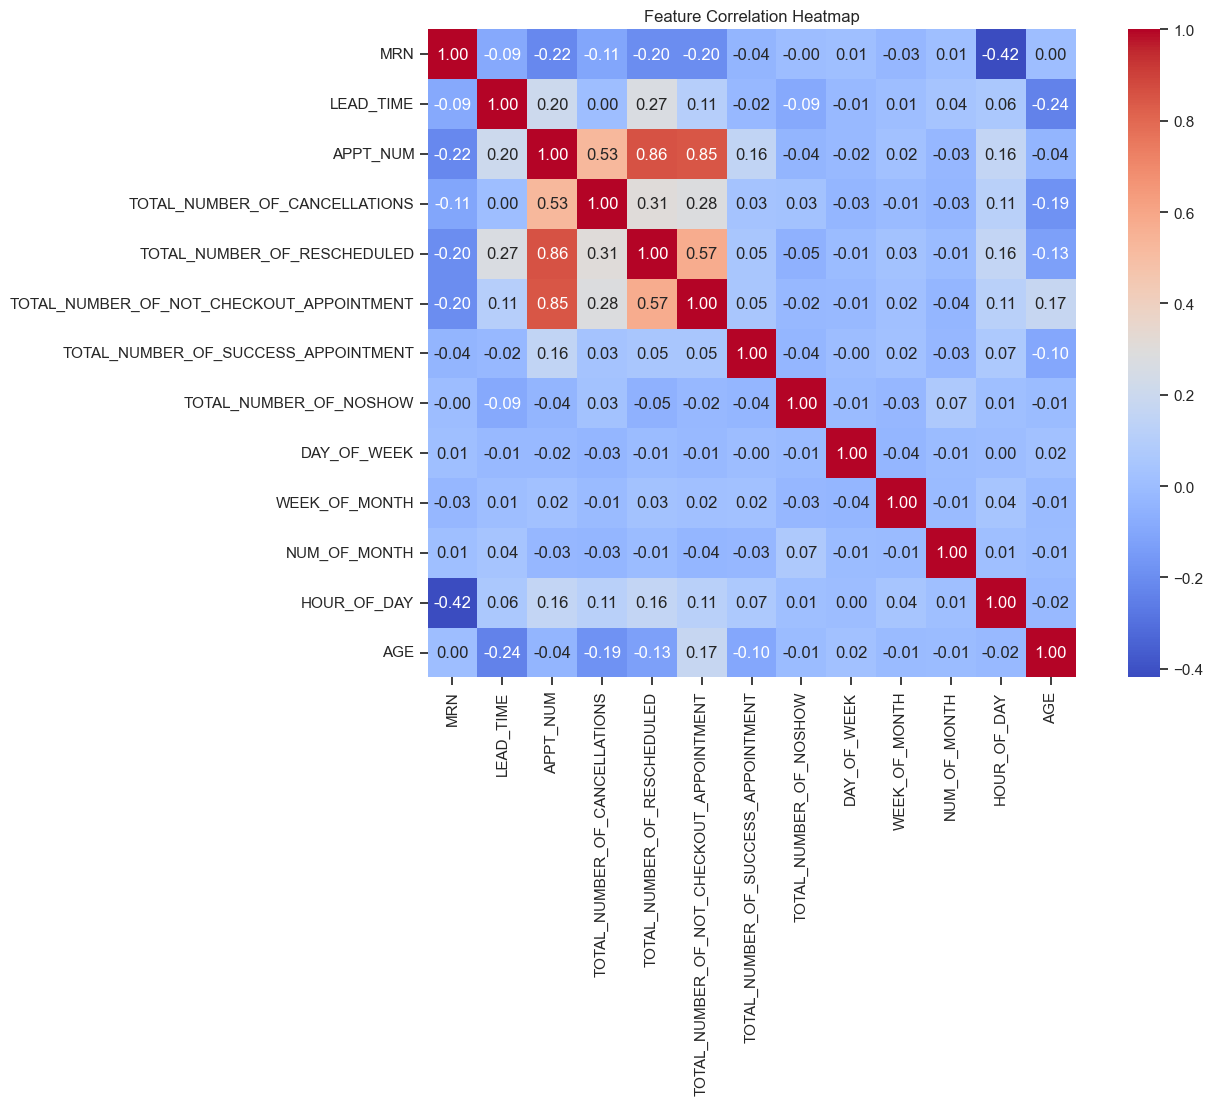

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = X_reduced_2.corr()

# Set up the figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Add title and display
plt.title("Feature Correlation Heatmap")
plt.show()


In [59]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced_2, y, test_size=0.2, random_state=31)

In [60]:
# Standardize features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#not standardizing because model had perfect accuracy for every model and I want to have at least not
#100% for some.

In [61]:
# Classifiers to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

In [62]:
# Performance metrics table
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Train accuracy
    train_accuracy = model.score(X_train, y_train)
    # Test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    # Other metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else float('nan')
    
    results.append([name, train_accuracy, test_accuracy, precision, recall, f1, auc])

In [63]:
# Convert to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
print(results_df)

           Model           Train Accuracy  Test Accuracy  Precision   Recall   \
0     Logistic Regression     0.970857       0.971035     0.742268   0.666667   
1           Decision Tree     0.998219       0.963675     0.647887   0.638889   
2           Random Forest     0.998219       0.966762     0.734568   0.550926   
3             Naive Bayes     0.608381       0.597341     0.112159   0.990741   
4     K-Nearest Neighbors     0.973943       0.962726     0.652850   0.583333   
5  Support Vector Machine     0.974834       0.970798     0.756906   0.634259   

   F1 Score     AUC    
0  0.702439  0.977118  
1  0.643357  0.814196  
2  0.629630  0.984234  
3  0.201507  0.973026  
4  0.616137  0.923994  
5  0.690176  0.979040  


Putting a note that I do not like that every single model has very high accuracy but since this is for deployment not ML I'm just going to roll with the model rather than try to find the cause of the unusually high accuracy

In [64]:
print(X_train.describe())
print(X_train.dtypes)

            MRN        LEAD_TIME     APPT_NUM    \
count  16848.000000  16848.000000  16848.000000   
mean      -0.003303      0.006729      0.006300   
std        1.002753      1.007081      1.003151   
min       -2.320946     -1.100619     -1.003756   
25%        0.242692     -0.753969     -0.787769   
50%        0.441195     -0.272510     -0.355794   
75%        0.601880      0.517081      0.508155   
max        0.719744      3.660619      3.963951   

       TOTAL_NUMBER_OF_CANCELLATIONS  TOTAL_NUMBER_OF_RESCHEDULED  \
count          16848.000000                  16848.000000           
mean              -0.001128                      0.006531           
std                1.000044                      1.005447           
min               -0.853072                     -0.784158           
25%               -0.853072                     -0.784158           
50%                0.078131                     -0.337607           
75%                0.078131                      0.108945

In [65]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate synthetic data similar to your original data
X_synthetic, y_synthetic = make_classification(
    n_samples=100,       # Number of synthetic samples
    n_features=X_train.shape[1],  # Match the number of features
    n_informative=10,    # Number of informative features (adjust as needed)
    n_redundant=2,       # Number of redundant features
    n_clusters_per_class=2,
    random_state=42
)

# Convert to DataFrame to match your original data structure
X_synthetic = pd.DataFrame(X_synthetic, columns=X_train.columns)
print("Synthetic Data:")
print(X_synthetic.head())


Synthetic Data:
      MRN    LEAD_TIME  APPT_NUM  TOTAL_NUMBER_OF_CANCELLATIONS  \
0 -1.360107  1.780521   0.033137           -0.315958              
1  0.418850  1.179249  -0.499590           -0.981755              
2  0.124202  2.360629  -0.727543            2.016765              
3  1.856135  0.332074  -3.226469           -0.818370              
4 -0.697384  2.448365   0.618707           -2.693443              

   TOTAL_NUMBER_OF_RESCHEDULED  TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT  \
0           2.784001                            3.976759                   
1           3.278855                            3.185886                   
2           0.564863                            4.504139                   
3           4.357696                            4.089486                   
4          -1.826617                            2.829468                   

   TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT  TOTAL_NUMBER_OF_NOSHOW  DAY_OF_WEEK  \
0              -1.255035                     

In [66]:
# Fit the random forest model with the original training data
best_rf_model = models['Random Forest']
best_rf_model.fit(X_train, y_train)

# Make predictions on the synthetic data
synthetic_predictions = best_rf_model.predict(X_synthetic)

# Display some predictions
print("Synthetic Predictions:")
print(pd.DataFrame({'Prediction': synthetic_predictions}).head())

Synthetic Predictions:
   Prediction
0       0    
1       0    
2       0    
3       0    
4       1    


In [67]:
import pickle

# Save the model using pickle
with open("best_random_forest.pkl", "wb") as file:
    pickle.dump(best_rf_model, file)
print("Model saved to best_random_forest.pkl")

Model saved to best_random_forest.pkl


In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pickle

# Define preprocessing
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), numerical_cols),
        ('cat', make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first')), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a full pipeline
pipeline = make_pipeline(preprocessor, RandomForestClassifier())

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the entire pipeline
with open("best_pipeline.pkl", "wb") as file:
    pickle.dump(pipeline, file)

print("Pipeline trained and saved as best_pipeline.pkl")


Pipeline trained and saved as best_pipeline.pkl


In [69]:
# Save the feature names used during training
feature_names = pipeline.named_steps['columntransformer'].get_feature_names_out()
with open("feature_names.pkl", "wb") as file:
    pickle.dump(feature_names, file)

print("Feature names saved successfully.")

Feature names saved successfully.
